In [2]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pyplot as plt
import numpy as np

In [3]:
summary = summary_iterator("./runs/Nov09_17-35-17_SDSS-F4GMG72RN2/events.out.tfevents.1668044117.SDSS-F4GMG72RN2.4396.0")

In [4]:
total_loss = []
kld_loss =[]
recon_loss = []
for items in summary_iterator("./runs/Nov09_17-34-57_SDSS-F4GMG72RN2/events.out.tfevents.1668044097.SDSS-F4GMG72RN2.4371.0"):
    for v in items.summary.value:
        if v.tag == 'total_loss':
            total_loss.append(v.simple_value)
        if v.tag == 'kld_loss':
            kld_loss.append(v.simple_value)
        if v.tag == 'recon_loss':
            recon_loss.append(v.simple_value)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


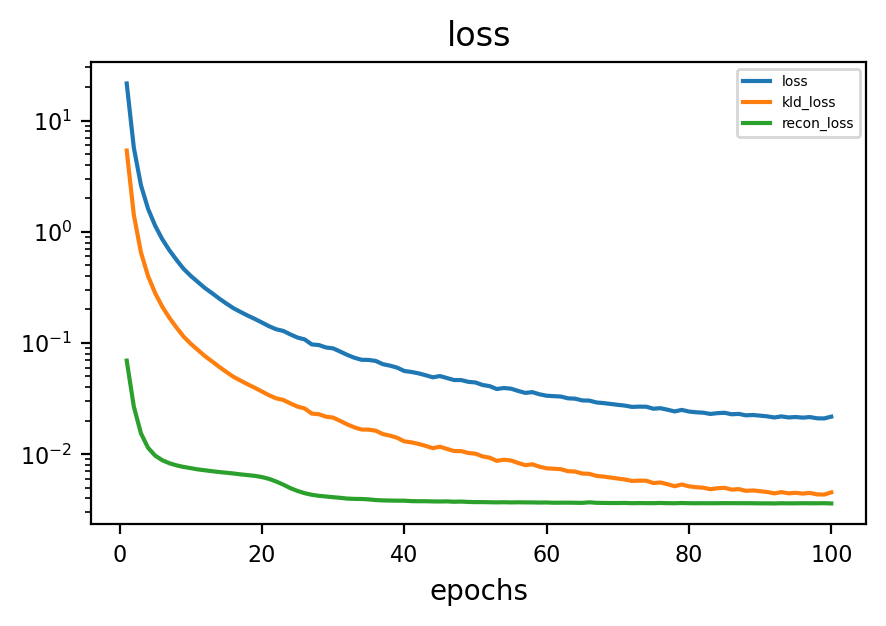

In [5]:
epoch = np.linspace(1,len(total_loss),len(total_loss))

fig, ax = plt.subplots(figsize=(5,3),dpi=200)
ax.set_yscale('log')
ax.plot(epoch, total_loss, label='loss')
ax.plot(epoch, kld_loss, label='kld_loss')
ax.plot(epoch, recon_loss, label='recon_loss')
ax.legend(fontsize=5)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_title('loss')
ax.set_xlabel('epochs')
plt.show()